In [144]:

from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from datetime import datetime
import time
import math
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from scipy import stats, integrate
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error  
from sklearn.linear_model import LogisticRegression
 
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('tableau-colorblind10')

In [133]:
data = pd.read_csv('WTI_Minute_Data_2018_2023.csv')
data["Date"] = pd.to_datetime(data["Date"])
data = data.iloc[: , 1:]
data = data.set_index('Date')
li = range(0, len(data), 500)
data = data.iloc[li, :][:2000]
data=data.iloc[:, 1:]
data.head()

,Close
Date,
2018-01-01 18:00:00,60.24
2018-01-02 05:51:00,60.31
2018-01-02 14:22:00,60.34
2018-01-03 06:20:00,60.57
2018-01-03 14:59:00,61.68


In [134]:

data_x = data.index.values
data_y = data['Close'].values
x_train, x_test, y_train, y_test = train_test_split(np.array(data_x).reshape(-1, 1), np.array(data_y), test_size=0.2)

In [135]:

data_mse = []
data_mae = []

 
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
 
RandomForest = RandomForestRegressor()
RandomForest.fit(x_train, y_train)
RandomForest_test_pred = RandomForest.predict(x_test)
print("RandomForest")
print(RandomForest_test_pred[:10])
print(y_test[:10])
print('mean_squared_error:', mean_squared_error(y_test, RandomForest_test_pred))  # mse
data_mse.append(mean_squared_error(y_test, RandomForest_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, RandomForest_test_pred))  # mae
data_mae.append(mean_absolute_error(y_test, RandomForest_test_pred))
 

RandomForest
[60.60081 50.442   51.49249 45.62977 56.15329 67.18    55.99595 71.0696
 66.3615  53.7761 ]
[60.226 51.43  50.891 46.3   55.805 66.44  56.976 71.18  66.81  53.315]
mean_squared_error: 0.5740447340665039
mean_absolute_error: 0.546136750000001


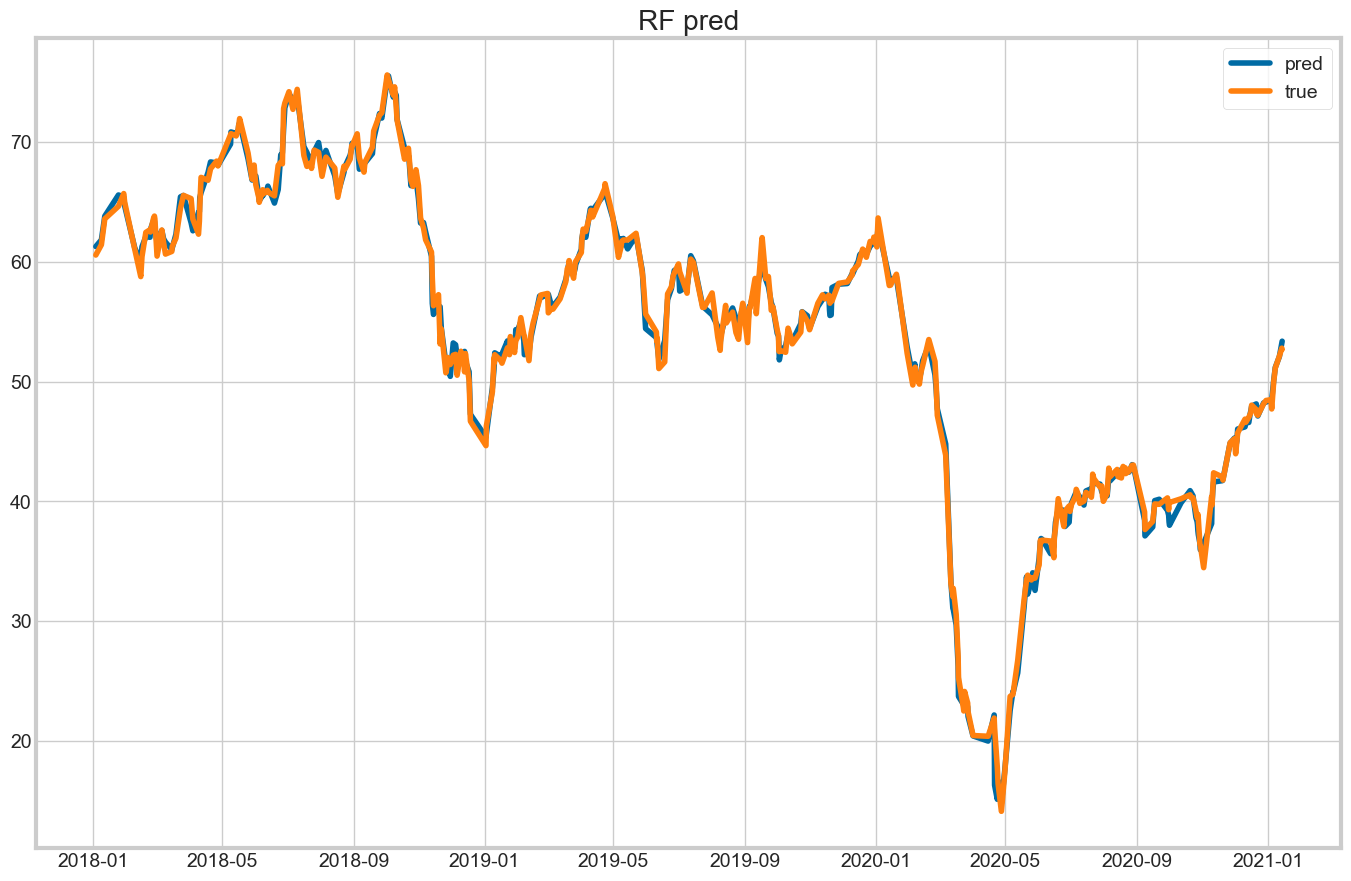

In [148]:
res_rf = pd.DataFrame({"pred": RandomForest_test_pred, "true": y_test, "Time": x_test.reshape(-1)})
res_rf = res_rf.set_index('Time')
res_rf = res_rf.sort_index()
res_rf.head()
plt.figure(figsize = (15, 10))
plt.plot(res_rf["pred"], label="pred")
plt.plot(res_rf["true"], label="true")
plt.title('RF pred')
plt.legend()

In [137]:
# AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
 
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(x_train, y_train)
AdaBoost_test_pred = AdaBoost.predict(x_test)
print("AdaBoost")
print(AdaBoost_test_pred[:10])
print(y_test[:10])
print('mean_squared_error:', mean_squared_error(y_test, AdaBoost_test_pred))  # mse
data_mse.append(mean_squared_error(y_test, AdaBoost_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, AdaBoost_test_pred))  # mae
data_mae.append(mean_absolute_error(y_test, AdaBoost_test_pred))
 

AdaBoost
[57.59964984 51.00100633 57.33176174 51.00100633 57.59964984 69.14769547
 57.59964984 69.14769547 69.40396154 57.59964984]
[60.226 51.43  50.891 46.3   55.805 66.44  56.976 71.18  66.81  53.315]
mean_squared_error: 8.679422237138231
mean_absolute_error: 2.2921965963720163


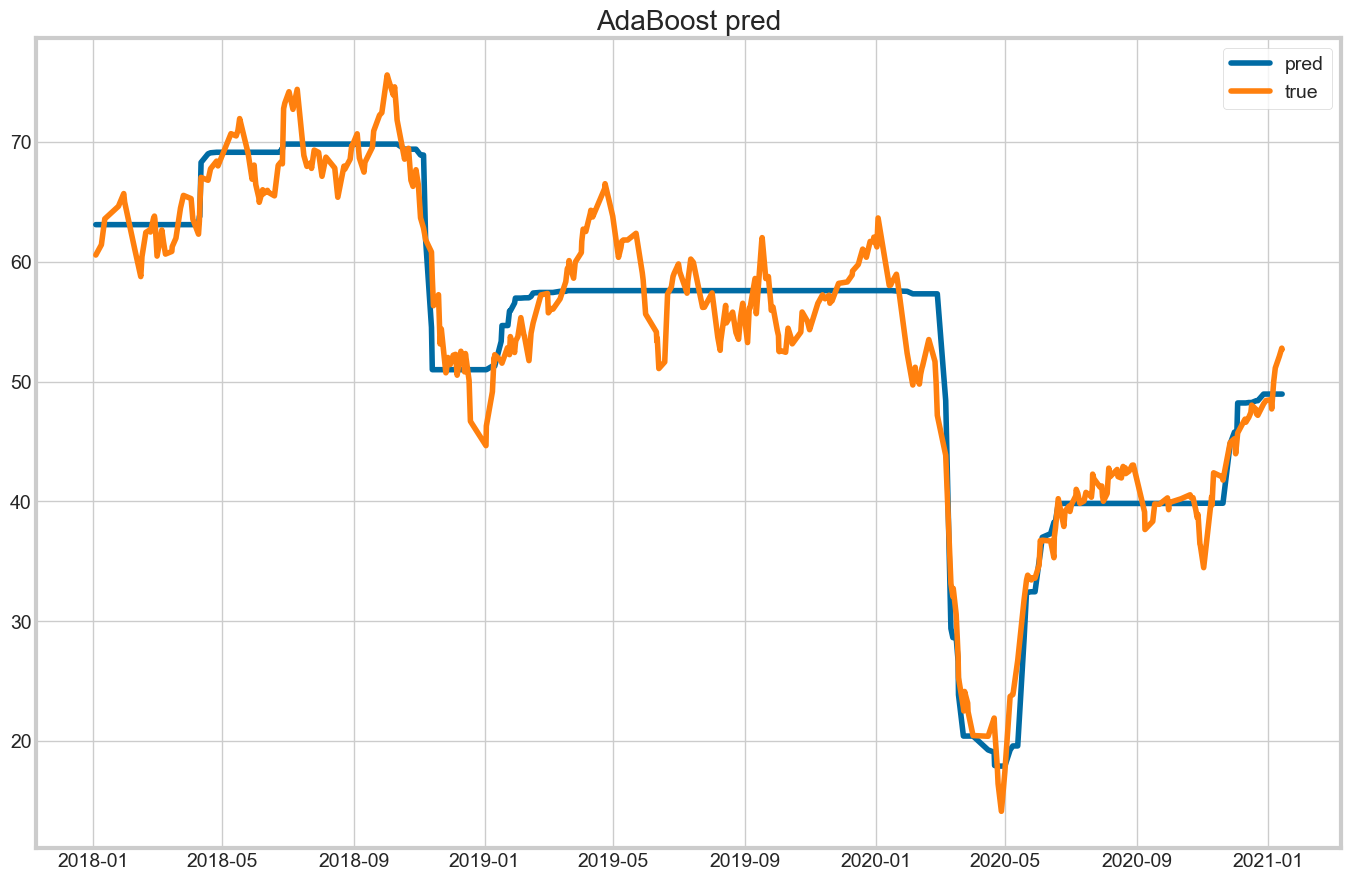

In [146]:
res_ada = pd.DataFrame({"pred": AdaBoost_test_pred, "true": y_test, "Time": x_test.reshape(-1)})
res_ada = res_ada.set_index('Time')
res_ada = res_ada.sort_index()
res_ada.head()
plt.figure(figsize = (15, 10))
plt.plot(res_ada["pred"], label="pred")
plt.plot(res_ada["true"], label="true")
plt.title('AdaBoost pred')
plt.legend()

In [140]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
 
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train, y_train)
GradientBoosting_test_pred = GradientBoosting.predict(x_test)
print("GradientBoosting")
print(GradientBoosting_test_pred[:10])
print(y_test[:10])
print('mean_squared_error:', mean_squared_error(y_test, GradientBoosting_test_pred))  # mse
data_mse.append(mean_squared_error(y_test, GradientBoosting_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, GradientBoosting_test_pred))  # mae
data_mae.append(mean_absolute_error(y_test, GradientBoosting_test_pred))
 

GradientBoosting
[60.20658348 51.9940377  51.54876334 47.52458469 55.84771297 67.05672677
 56.79250924 70.2674615  67.11147696 55.64115084]
[60.226 51.43  50.891 46.3   55.805 66.44  56.976 71.18  66.81  53.315]
mean_squared_error: 1.4384904777100518
mean_absolute_error: 0.8742185129682583


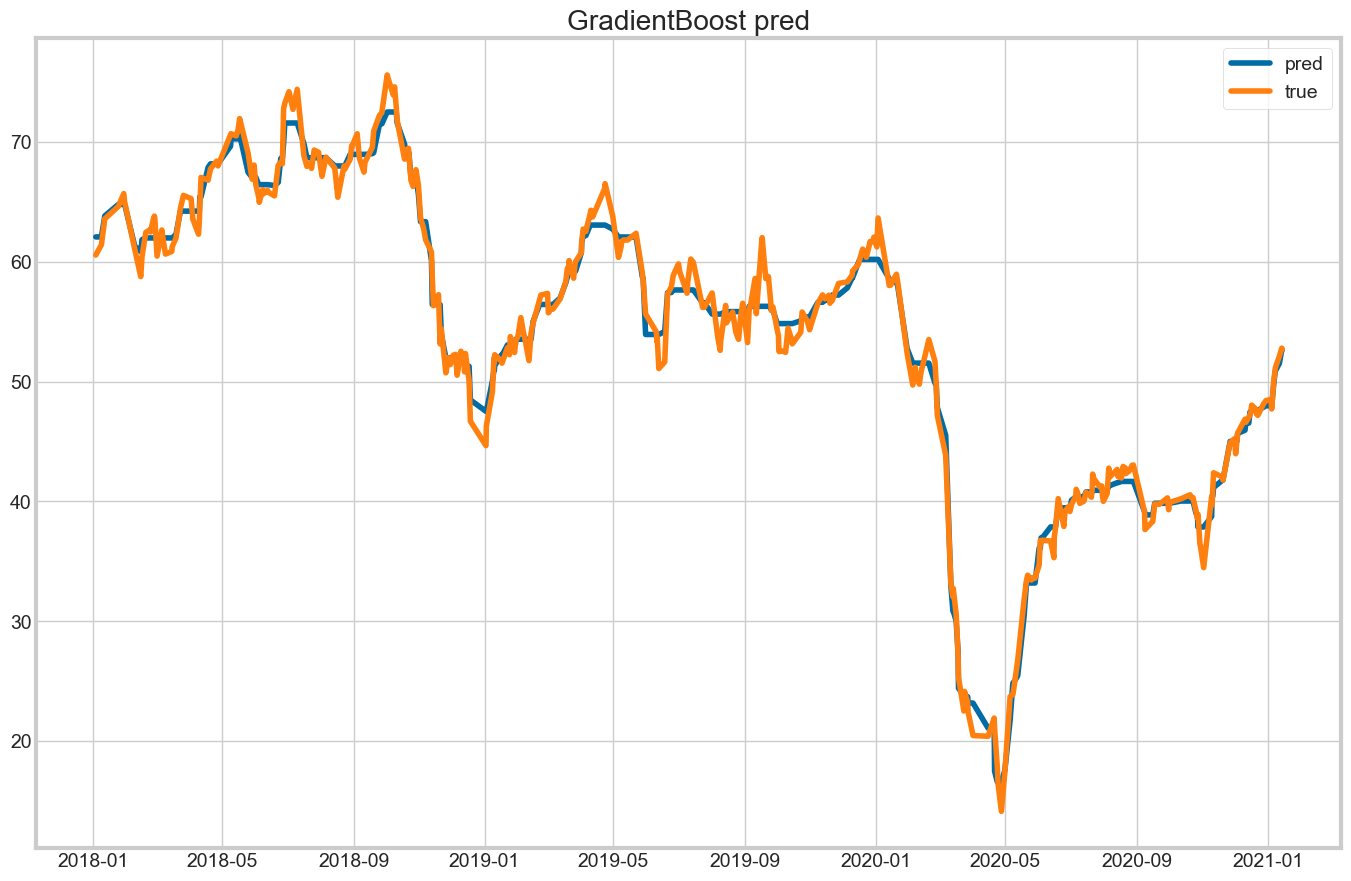

In [147]:
res_gb = pd.DataFrame({"pred": GradientBoosting_test_pred, "true": y_test, "Time": x_test.reshape(-1)})
res_gb = res_gb.set_index('Time')
res_gb = res_gb.sort_index()
res_gb.head()
plt.figure(figsize = (15, 10))
plt.plot(res_gb["pred"], label="pred")
plt.plot(res_gb["true"], label="true")
plt.title('GradientBoost pred')
plt.legend()